##### Copyright 2018 The TensorFlow Authors.
##### Translate in Japanse by Masatoshi Itagaki @masa-ita

In [35]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [36]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Train your first neural network: basic classification
# はじめてのニューラルネットワーク：分類問題の初歩

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/models/blob/master/samples/core/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details, this is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

このガイドでは、スニーカーやシャツなど、身に着けるものの写真を分類するニューラルネットワークのモデルを訓練します。すべての詳細を理解できなくても問題ありません。TensorFlowの全体を早足で掴むためのもので、詳細についてはあとから見ていくことになります。

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

このガイドでは、TensorFlowのモデルを構築し訓練するためのハイレベルのAPIである [tf.keras](https://www.tensorflow.org/guide/keras)を使用します。

In [37]:
# TensorFlow and tf.keras
# TensorFlow と ｔｆ.keras のインポート
import tensorflow as tf
from tensorflow import keras

# Helper libraries
# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


## Import the Fashion MNIST dataset
## ライブラリインポートとファッションMNISTデータセット

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

このガイドでは、[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)を使用します。Fashion MNISTには10カテゴリーの白黒画像70,000枚が含まれています。それぞれは下図のような1枚に付き1種類の衣料品が写っている低解像度（28×28ピクセル）の画像です。

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

Fashion MNISTは、画像処理のための機械学習での"Hello, World"としてしばしば登場する[MNIST](http://yann.lecun.com/exdb/mnist/) データセットの代替として開発されたものです。MNISTデータセットは手書きの数字（0, 1, 2 など）から構成されており、そのフォーマットはこれから使うFashion MNISTと全く同じです。

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code. 

Fashion NISTを使うのは、目先を変える意味もありますが、普通のMNISTよりも少しだけ手応えがあるからでもあります。どちらのデータセットも比較的小さく、アルゴリズムが期待したとおりに機能するかどうかを確かめるために使われます。プログラムのテストやデバッグのためには、よい出発点になります。

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

ここでは、60,000枚の画像を訓練に、10,000枚の画像を、ネットワークが学習した画像分類の正確性を評価するのに使います。TensorFlowを使うと、下記のようにFashion MNISTのデータを簡単にインポートし、ロードすることが出来ます。

In [38]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

ロードしたデータセットは、NumPY配列になります。

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.


* `train_images` と `train_labels` の2つの配列は、モデルの訓練に使用される**訓練用データセット**です。
* 訓練されたモデルは、 `test_images` と `test_labels` 配列からなる**テスト用データセット**を使ってテストします。

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

画像は28×28のNumPy配列から構成されています。それぞれのピクセルの値は0から255の間の整数です。**ラベル**（label）は、0から9までの整数の配列です。それぞれの数字が下表のように、衣料品の**クラス**（class）に対応しています。

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

画像はそれぞれ単一のラベルに分類されます。データセットには上記の**クラス名**が含まれていないため、後ほど画像を出力するときのために、クラス名を保存しておきます。

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
## データを調べる

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

モデルの訓練を行う前に、データセットのフォーマットを見てみましょう。下記のように、訓練用データセットには28×28ピクセルの画像が60,000枚が含まれています。

In [40]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

同様に、訓練用データセットには60,000個のラベルが含まれます。

In [41]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

ラベルはそれぞれ、0から9までの間の整数です。

In [42]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

テスト用データセットには、10,000枚の画像が含まれます。画像は28×28ピクセルで構成されています。

In [43]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

テスト用データセットには10,000個のラベルが含まれます。

In [44]:
len(test_labels)

10000

## Preprocess the data
## データの前処理

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

ネットワークを訓練する前に、データを前処理する必要があります。最初の画像を調べてみればわかるように、ピクセルの値は0から255の間の数値です。

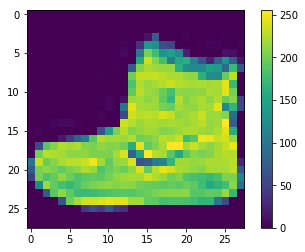

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

ニューラルネットワークにデータを投入する前に、これらの値を0から1までの範囲にスケールします。そのためには、画素の値を整数から浮動小数点に変換し、255で割ります。プログラムは下記の通りです。

It's important that the *training set* and the *testing set* are preprocessed in the same way:

**訓練用データセット**と**テスト用データセット**は、同じように前処理することが重要です。

In [46]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

**訓練用データセット**の最初の25枚の画像を、クラス名付きで表示してみましょう。ネットワークを構築・訓練する前に、データが正しいフォーマットになっていることを確認します。

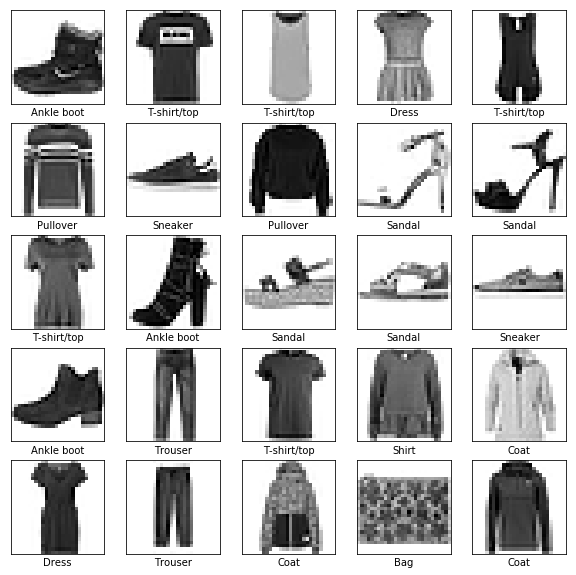

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
#    plt.grid('off')
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model
## モデルの構築

Building the neural network requires configuring the layers of the model, then compiling the model.

ニューラルネットワークを構築するには、まずモデルの階層を定義し、その後モデルをコンパイルします。

### Setup the layers
### 階層の設定

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

ニューラルネットワークを形作る基本的な構成要素は**層**（ｌayer）です。層は、入力されたデータから「表現」を抽出します。それらの「表現」は、今取り組もうとしている問題に対して、より「意味のある」ものであることが期待されます。


Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

ディープラーニングモデルのほとんどは、単純な層の積み重ねで構成されています。`tf.keras.layers.Dense` のような層のほとんどには、訓練中に学習されるパラメータが存在します。

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

このネットワークの最初の層は、`tf.keras.layers.Flatten` です。この層は、画像を（28×28ピクセルの）2次元配列から、28×28＝784ピクセルの、1次元配列に変換します。この層が、画像の中に積まれているピクセルの行を取り崩し、横に並べると考えてみましょう。この層には学習すべきパラメータはなく、ただデータのフォーマット変換を行うだけです。

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

ピクセルが１次元化されたあと、ネットワークは２つの `tf.keras.layers.Dense` 層となります。これらの層は、密結合あるいは全結合された神経の層となります。最初の  `Dense`  層には、128個のノード（あるはニューロン）があります。最後の層でもある２番めの層は、10ノードの**softmax**層です。この層は、合計が1になる10個の確率の配列を返します。それぞれのノードは、今見ている画像が、10個のクラスの１つ１つに属する確率を出力します。

### Compile the model
### モデルのコンパイル

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

モデルが訓練できるようになるには、いくつかの設定を追加する必要があります。それらの設定は、モデルの**コンパイル**(compile）時に追加されます。

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


* **損失関数**（loss function） —訓練中にモデルがどれくらい正確かを測定します。この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようというわけです。
* **オプティマイザ**（optimizer）—モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定します。
* **メトリクス**（metrics） —訓練とテストのステップを監視するのに使用します。下記の例では*accuracy* （正確度）、つまり、画像が正しく分類された比率を使用しています。

In [49]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
## モデルの訓練

Training the neural network model requires the following steps:

ニューラルネットワークの訓練には次のようなステップが必要です。

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 


1. モデルに訓練用データを投入します—この例では `train_images` と `train_labels` の２つの配列です。
2. モデルは、画像とラベルの対応関係を学習します。
3. モデルにテスト用データセットの予測（分類）を行わせます—この例では `test_images` 配列です。その後、予測結果と `test_labels` 配列を照合します。 


To start training,  call the `model.fit` method—the model is "fit" to the training data:

訓練を開始するには、`model.fit` メソッドを呼び出します。モデルを訓練用データに "fit"（適合）させるという意味です。

In [50]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.5018 - acc: 0.8233
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.3749 - acc: 0.8657
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.3380 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3126 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2945 - acc: 0.8927


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

モデルの訓練の進行とともに、損失値と正解率が表示されます。このモデルの場合、訓練用データでは0.88（すなわち88%）の正解率に達します。

## Evaluate accuracy
## 正解率の評価

Next, compare how the model performs on the test dataset:

次に、テスト用データセットに対するモデルの性能を比較します。

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/step
Test accuracy: 0.8745


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data. 

ご覧の通り、テスト用データセットでの正解率は、訓練用データセットでの正解率よりも少し低くなります。この訓練時の正解率とテスト時の正解率の差は、**過学習**（over fitting）の一例です。過学習とは、新しいデータに対する機械学習モデルの性能が、訓練時と比較して低下する現象です。

## Make predictions
## 予測する

With the model trained, we can use it to make predictions about some images.

モデルの訓練が終わったら、そのモデルを使って画像の分類予測を行うことが出来ます。

In [21]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

これは、モデルがテスト用データセットの画像の一つ一つを分類予測した結果です。最初の予測を見てみましょう。

In [22]:
predictions[0]

array([3.7647846e-05, 2.4545077e-06, 8.3541372e-06, 1.4088516e-05,
       5.0713261e-05, 4.4085118e-03, 3.2012668e-04, 8.8044859e-02,
       1.1537084e-04, 9.0699792e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

予測結果は、10個の数字の配列です。これは、その画像が10の衣料品の種類のそれぞれに該当するかの「確信度」を表しています。どのラベルが一番確信度が高いかを見てみましょう。

In [23]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or `class_names[9]`. And we can check the test label to see this is correct:

というわけで、このモデルは、この画像が、アンクルブーツ、`class_names[9]` である可能性が最も高いと判断したことになります。これがただしかどうか、テスト用ラベルを見てみましょう。

In [24]:
test_labels[0]

9

Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red.

予測の中のいくつかのイメージを、予測値とともに表示してみましょう。正しい予測はグリーンで、誤っている予測は赤でラベルを表示します。

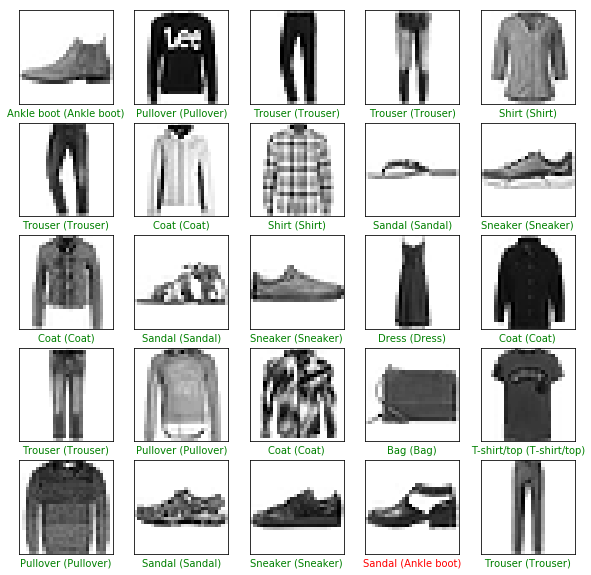

In [30]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
# テスト画像の最初の25枚を、予測ラベルと正解ラベルとともに表示
# 正しいラベルはグリーンに、誤ったラベルは赤で表示
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid('off')
    ｐｌｔ.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

Finally, use the trained model to make a prediction about a single image. 

最後に、訓練済みモデルを使って1枚の画像に対する予測を行います。

In [31]:
# Grab an image from the test dataset
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

`tf.keras` モデルは、サンプルの中の**バッチ**（batch）あるいは「集まり」について予測を行うように作られています。そのため、1枚の画像を使う場合でも、リスト化する必要があります。

In [32]:
# Add the image to a batch where it's the only member.
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

予測を行います。

In [33]:
predictions = model.predict(img)

print(predictions)

[[3.7647882e-05 2.4545077e-06 8.3541372e-06 1.4088529e-05 5.0713261e-05
  4.4085118e-03 3.2012668e-04 8.8044807e-02 1.1537084e-04 9.0699792e-01]]


`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

`model.predict` メソッドの戻り値は、リストのリストです。リストの要素のそれぞれが、バッチの中の画像に対応します。バッチの中から、（１つだけですが）予測を取り出します。

In [34]:
prediction = predictions[0]

np.argmax(prediction)

9

And, as before, the model predicts a label of 9.

というわけで、モデルは9というラベルを予測しました。